In [1]:

import os, shutil, sys
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.inception_v3 import preprocess_input

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom
from PIL import Image
import cv2
import shutil
from skimage import exposure

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
#get working directory
os.getcwd()

'C:\\Users\\Mojtaba Jafari Tadi\\Projects_AMK\\Radiology Project\\fatpad'

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'brucechou1983_CheXNet_Keras_0.3.0_weights.h5',
 'CNN_automated_medical_diagnostics_five_layers_chopped_two_classes_trained_on_twenty_epochs_Adam_0.0001.ipynb',
 'CNN_FATPAD_MultiHeadAttention.ipynb',
 'CNN_FATPAD_ResidualAttention.ipynb',
 'CNN_FATPAD_SimplePlainNN.ipynb',
 'CNN_FATPAD_TransferLearning-DenseNet.ipynb',
 'CNN_FATPAD_TransferLearning-EfficientNet.ipynb',
 'CNN_FATPAD_TransferLearning-Inception.ipynb',
 'CNN_FATPAD_TransferLearning-MobileNetSE.ipynb',
 'CNN_FATPAD_TransferLearning-MobileNet_MultiInput.ipynb',
 'CNN_FATPAD_TransferLearning-NASNet.ipynb',
 'CNN_FATPAD_TransferLearning-ResNet.ipynb',
 'CNN_FATPAD_TransferLearning-Xception.ipynb',
 'CNN_FATPAD_TransferLearning.ipynb',
 'Labels_FatPadDetection.xlsx',
 'Prepare_Xray_Data-CLAHE.ipynb',
 'Prepare_Xray_Data.ipynb',
 'Prepare_Xray_Data_Clahe_HistEq_Inv.ipynb',
 'Prepare_Xray_Data_LBP.ipynb',
 'README.md',
 'ResidualAttentionNetwork.py',
 'x-ray-images-enhancement',
 

In [5]:
#change working directory to where the datasets are
root_directory=os.chdir('C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project')

In [6]:
#Provide train, validation, and test ONLY EFFUSION DATASET
#base_dir_train = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/train'
#base_dir_validate = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/validation'
#base_dir_test = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/test'

#print(base_dir_train)

In [7]:
#Provide train, validation, and test EFFUSION + FRACTURE on LATERAL SIDE
base_dir_train = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheSplit/train'
base_dir_validate = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheSplit/validation'
base_dir_test = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheSplit/test'

print(base_dir_train)

C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheSplit/train


In [39]:
#run tensorflow-keras ImageDataGenerator on the directory which contains train, validate and test
#train_datagen = ImageDataGenerator(
 #   rescale=1./255, # new parameter (maps pixel values to floats)
 #   rotation_range=40,
 #   width_shift_range=0.2,
  ##  height_shift_range=0.2,
  #  shear_range=0.2,
  #  zoom_range=0.25,
  #  horizontal_flip=True,
  #  fill_mode='nearest') # Note: I added this, too

#def gray_to_rgb(img):
 #   return np.repeat(img, 3, 2)

IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1
IMAGE_SHAPE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
batch_size=32
epochs = 500
num_classes = 2

train_datagen = ImageDataGenerator(rescale=1./255,samplewise_center=True, 
              samplewise_std_normalization=True, 
              horizontal_flip = True, 
              vertical_flip = False, 
              height_shift_range= 0.05, 
              width_shift_range=0.05, 
              rotation_range=35, 
              shear_range = 0.41,
              fill_mode = 'nearest',
              zoom_range=0.25,preprocessing_function=preprocess_input)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_dir_train,
       shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        base_dir_validate, 
       target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode='rgb',
    shuffle=True)

test_generator = train_datagen.flow_from_directory(
        base_dir_test,
        target_size=IMAGE_SIZE,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode='rgb',
        shuffle=False)



Found 3227 images belonging to 2 classes.
Found 1211 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


In [40]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def plot_history(h):
    acc = h.history['acc']
    val_acc = h.history['val_acc']
    loss = h.history['loss']
    val_loss = h.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(411)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='validation')
    # plot accuracy
    plt.subplot(412)
    plt.title('Classification Accuracy')
    plt.plot(history.history['binary_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_binary_accuracy'], color='orange', label='validation')
    
    plt.subplot(413)
    plt.title('Classification Precision')
    plt.plot(history.history['precision'], color='blue', label='train')
    plt.plot(history.history['val_precision'], color='orange', label='validation')
    
    plt.subplot(414)
    plt.title('Classification Recall')
    plt.plot(history.history['recall'], color='blue', label='train')
    plt.plot(history.history['val_recall'], color='orange', label='validation')
    # save plot to file
    plt.show()
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    #plt.close()


In [41]:
train_generator.image_shape


(224, 224, 3)

In [42]:
from matplotlib import pyplot
gr=0
if gr: 
    fig, axs = plt.subplots(4,4, figsize=(15, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(16):
        # define subplot
        # generate batch of images
        batch = train_generator.next()
        # convert to unsigned integers for viewing
        image = batch[0]
        # plot raw pixel data
        axs[i].imshow(image[i].reshape(200,200), cmap=pyplot.get_cmap('gray'))# show the figure

In [43]:
METRICS = [
    tensorflow.keras.metrics.BinaryAccuracy(),
    tensorflow.keras.metrics.Precision(name="precision"),
    tensorflow.keras.metrics.Recall(name="recall"),
]


In [44]:
initial_learning_rate = 1e-4
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [45]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
#from tensorflow.keras.applications import InceptionV3
from keras.applications import MobileNet,MobileNetV2
inputs = layers.Input(shape=train_generator.image_shape)

#base_model = keras.applications.MobileNetV2(input_tensor=inputs,weights="imagenet",  include_top=False)
base_model = keras.applications.MobileNet(input_tensor=inputs,weights="imagenet",include_top=False)

#base_model = tensorflow.keras.Model(inputs=base_model.input, outputs=base_model.layers[-5].output)
base_model.summary()
model = models.Sequential()
model.add(base_model)
model.add(layers.BatchNormalization())
model.add(layers.GlobalAvgPool2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation="softmax", name="pred"))

#SE=squeeze_excite_block(base_model.output)
#avg = keras.layers.GlobalAveragePooling2D()(SE)
#output = keras.layers.Dense(2, activation="softmax")(avg)
#model = keras.models.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False
#for layer in base_model.layers[:150]:
#    layer.trainable = False
#for layer in base_model.layers[150:]:
#    layer.trainable = True

#optimizer = keras.optimizers.RMSprop(lr=0.001)
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=METRICS)
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [46]:
checkpoint_cb = tensorflow.keras.callbacks.ModelCheckpoint("xray_model_110321_MobileNetV2.h5", save_best_only=True)

early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(
    patience=50, restore_best_weights=True
)

In [47]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [48]:
batch_size=32
hist = model.fit(train_generator,
      epochs=500,
    steps_per_epoch=STEP_SIZE_TRAIN,
      validation_data=validation_generator,
     validation_steps=STEP_SIZE_VALID,
      verbose=1,callbacks=[checkpoint_cb])




Epoch 1/500
100/100 [==============================] - 55s 529ms/step - loss: 0.9988 - binary_accuracy: 0.4895 - precision: 0.4895 - recall: 0.4895 - val_loss: 0.7455 - val_binary_accuracy: 0.4797 - val_precision: 0.4797 - val_recall: 0.4797
Epoch 2/500
100/100 [==============================] - 52s 524ms/step - loss: 0.9547 - binary_accuracy: 0.4782 - precision: 0.4782 - recall: 0.4782 - val_loss: 0.6967 - val_binary_accuracy: 0.5490 - val_precision: 0.5490 - val_recall: 0.5490
Epoch 3/500
100/100 [==============================] - 52s 523ms/step - loss: 0.8950 - binary_accuracy: 0.4941 - precision: 0.4941 - recall: 0.4941 - val_loss: 0.6913 - val_binary_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625
Epoch 4/500
100/100 [==============================] - 52s 523ms/step - loss: 0.8334 - binary_accuracy: 0.5198 - precision: 0.5198 - recall: 0.5198 - val_loss: 0.6898 - val_binary_accuracy: 0.5650 - val_precision: 0.5650 - val_recall: 0.5650
Epoch 5/500
100/100 [===========

Epoch 35/500
100/100 [==============================] - 53s 525ms/step - loss: 0.7730 - binary_accuracy: 0.5364 - precision: 0.5364 - recall: 0.5364 - val_loss: 0.6493 - val_binary_accuracy: 0.6123 - val_precision: 0.6123 - val_recall: 0.6123
Epoch 36/500
100/100 [==============================] - 52s 525ms/step - loss: 0.7550 - binary_accuracy: 0.5571 - precision: 0.5571 - recall: 0.5571 - val_loss: 0.6488 - val_binary_accuracy: 0.6106 - val_precision: 0.6106 - val_recall: 0.6106
Epoch 37/500
100/100 [==============================] - 52s 524ms/step - loss: 0.7535 - binary_accuracy: 0.5509 - precision: 0.5509 - recall: 0.5509 - val_loss: 0.6484 - val_binary_accuracy: 0.6182 - val_precision: 0.6182 - val_recall: 0.6182
Epoch 38/500
100/100 [==============================] - 53s 525ms/step - loss: 0.7340 - binary_accuracy: 0.5628 - precision: 0.5628 - recall: 0.5628 - val_loss: 0.6459 - val_binary_accuracy: 0.6191 - val_precision: 0.6191 - val_recall: 0.6191
Epoch 39/500
100/100 [======

Epoch 69/500
100/100 [==============================] - 53s 529ms/step - loss: 0.7186 - binary_accuracy: 0.5573 - precision: 0.5573 - recall: 0.5573 - val_loss: 0.6333 - val_binary_accuracy: 0.6419 - val_precision: 0.6419 - val_recall: 0.6419
Epoch 70/500
100/100 [==============================] - 53s 527ms/step - loss: 0.7067 - binary_accuracy: 0.5605 - precision: 0.5605 - recall: 0.5605 - val_loss: 0.6346 - val_binary_accuracy: 0.6436 - val_precision: 0.6436 - val_recall: 0.6436
Epoch 71/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6915 - binary_accuracy: 0.6012 - precision: 0.6012 - recall: 0.6012 - val_loss: 0.6358 - val_binary_accuracy: 0.6394 - val_precision: 0.6394 - val_recall: 0.6394
Epoch 72/500
100/100 [==============================] - 53s 526ms/step - loss: 0.7065 - binary_accuracy: 0.5937 - precision: 0.5937 - recall: 0.5937 - val_loss: 0.6332 - val_binary_accuracy: 0.6436 - val_precision: 0.6436 - val_recall: 0.6436
Epoch 73/500
100/100 [======

Epoch 103/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6839 - binary_accuracy: 0.6008 - precision: 0.6008 - recall: 0.6008 - val_loss: 0.6276 - val_binary_accuracy: 0.6571 - val_precision: 0.6571 - val_recall: 0.6571
Epoch 104/500
100/100 [==============================] - 52s 525ms/step - loss: 0.6742 - binary_accuracy: 0.6076 - precision: 0.6076 - recall: 0.6076 - val_loss: 0.6256 - val_binary_accuracy: 0.6596 - val_precision: 0.6596 - val_recall: 0.6596
Epoch 105/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6784 - binary_accuracy: 0.5951 - precision: 0.5951 - recall: 0.5951 - val_loss: 0.6272 - val_binary_accuracy: 0.6571 - val_precision: 0.6571 - val_recall: 0.6571
Epoch 106/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6583 - binary_accuracy: 0.6152 - precision: 0.6152 - recall: 0.6152 - val_loss: 0.6264 - val_binary_accuracy: 0.6579 - val_precision: 0.6579 - val_recall: 0.6579
Epoch 107/500
100/100 [=

100/100 [==============================] - 53s 525ms/step - loss: 0.6869 - binary_accuracy: 0.5883 - precision: 0.5883 - recall: 0.5883 - val_loss: 0.6214 - val_binary_accuracy: 0.6579 - val_precision: 0.6579 - val_recall: 0.6579
Epoch 137/500
100/100 [==============================] - 52s 525ms/step - loss: 0.6476 - binary_accuracy: 0.6261 - precision: 0.6261 - recall: 0.6261 - val_loss: 0.6192 - val_binary_accuracy: 0.6605 - val_precision: 0.6605 - val_recall: 0.6605
Epoch 138/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6676 - binary_accuracy: 0.6069 - precision: 0.6069 - recall: 0.6069 - val_loss: 0.6210 - val_binary_accuracy: 0.6562 - val_precision: 0.6562 - val_recall: 0.6562
Epoch 139/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6621 - binary_accuracy: 0.5934 - precision: 0.5934 - recall: 0.5934 - val_loss: 0.6209 - val_binary_accuracy: 0.6571 - val_precision: 0.6571 - val_recall: 0.6571
Epoch 140/500
100/100 [===============

Epoch 170/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6466 - binary_accuracy: 0.6307 - precision: 0.6307 - recall: 0.6307 - val_loss: 0.6161 - val_binary_accuracy: 0.6664 - val_precision: 0.6664 - val_recall: 0.6664
Epoch 171/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6417 - binary_accuracy: 0.6357 - precision: 0.6357 - recall: 0.6357 - val_loss: 0.6173 - val_binary_accuracy: 0.6706 - val_precision: 0.6706 - val_recall: 0.6706
Epoch 172/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6343 - binary_accuracy: 0.6543 - precision: 0.6543 - recall: 0.6543 - val_loss: 0.6153 - val_binary_accuracy: 0.6715 - val_precision: 0.6715 - val_recall: 0.6715
Epoch 173/500
100/100 [==============================] - 52s 525ms/step - loss: 0.6353 - binary_accuracy: 0.6350 - precision: 0.6350 - recall: 0.6350 - val_loss: 0.6154 - val_binary_accuracy: 0.6748 - val_precision: 0.6748 - val_recall: 0.6748
Epoch 174/500
100/100 [=

100/100 [==============================] - 53s 525ms/step - loss: 0.6411 - binary_accuracy: 0.6352 - precision: 0.6352 - recall: 0.6352 - val_loss: 0.6088 - val_binary_accuracy: 0.6841 - val_precision: 0.6841 - val_recall: 0.6841
Epoch 204/500
100/100 [==============================] - 52s 525ms/step - loss: 0.6227 - binary_accuracy: 0.6593 - precision: 0.6593 - recall: 0.6593 - val_loss: 0.6118 - val_binary_accuracy: 0.6782 - val_precision: 0.6782 - val_recall: 0.6782
Epoch 205/500
100/100 [==============================] - 53s 529ms/step - loss: 0.6483 - binary_accuracy: 0.6332 - precision: 0.6332 - recall: 0.6332 - val_loss: 0.6122 - val_binary_accuracy: 0.6774 - val_precision: 0.6774 - val_recall: 0.6774
Epoch 206/500
100/100 [==============================] - 53s 528ms/step - loss: 0.6342 - binary_accuracy: 0.6308 - precision: 0.6308 - recall: 0.6308 - val_loss: 0.6114 - val_binary_accuracy: 0.6782 - val_precision: 0.6782 - val_recall: 0.6782
Epoch 207/500
100/100 [===============

Epoch 237/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6235 - binary_accuracy: 0.6527 - precision: 0.6527 - recall: 0.6527 - val_loss: 0.6054 - val_binary_accuracy: 0.6816 - val_precision: 0.6816 - val_recall: 0.6816
Epoch 238/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6222 - binary_accuracy: 0.6496 - precision: 0.6496 - recall: 0.6496 - val_loss: 0.6036 - val_binary_accuracy: 0.6883 - val_precision: 0.6883 - val_recall: 0.6883
Epoch 239/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6258 - binary_accuracy: 0.6437 - precision: 0.6437 - recall: 0.6437 - val_loss: 0.6061 - val_binary_accuracy: 0.6824 - val_precision: 0.6824 - val_recall: 0.6824
Epoch 240/500
100/100 [==============================] - 53s 526ms/step - loss: 0.6278 - binary_accuracy: 0.6481 - precision: 0.6481 - recall: 0.6481 - val_loss: 0.6057 - val_binary_accuracy: 0.6824 - val_precision: 0.6824 - val_recall: 0.6824
Epoch 241/500
100/100 [=

100/100 [==============================] - 53s 527ms/step - loss: 0.6135 - binary_accuracy: 0.6776 - precision: 0.6776 - recall: 0.6776 - val_loss: 0.6021 - val_binary_accuracy: 0.6883 - val_precision: 0.6883 - val_recall: 0.6883
Epoch 271/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6105 - binary_accuracy: 0.6842 - precision: 0.6842 - recall: 0.6842 - val_loss: 0.6040 - val_binary_accuracy: 0.6841 - val_precision: 0.6841 - val_recall: 0.6841
Epoch 272/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6216 - binary_accuracy: 0.6464 - precision: 0.6464 - recall: 0.6464 - val_loss: 0.6016 - val_binary_accuracy: 0.6850 - val_precision: 0.6850 - val_recall: 0.6850
Epoch 273/500
100/100 [==============================] - 53s 526ms/step - loss: 0.5992 - binary_accuracy: 0.6810 - precision: 0.6810 - recall: 0.6810 - val_loss: 0.6013 - val_binary_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875
Epoch 274/500
100/100 [===============

Epoch 304/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6195 - binary_accuracy: 0.6550 - precision: 0.6550 - recall: 0.6550 - val_loss: 0.6000 - val_binary_accuracy: 0.6892 - val_precision: 0.6892 - val_recall: 0.6892
Epoch 305/500
100/100 [==============================] - 53s 527ms/step - loss: 0.6081 - binary_accuracy: 0.6826 - precision: 0.6826 - recall: 0.6826 - val_loss: 0.5993 - val_binary_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875
Epoch 306/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6283 - binary_accuracy: 0.6505 - precision: 0.6505 - recall: 0.6505 - val_loss: 0.5991 - val_binary_accuracy: 0.6892 - val_precision: 0.6892 - val_recall: 0.6892
Epoch 307/500
100/100 [==============================] - 52s 525ms/step - loss: 0.6011 - binary_accuracy: 0.6777 - precision: 0.6777 - recall: 0.6777 - val_loss: 0.5971 - val_binary_accuracy: 0.6934 - val_precision: 0.6934 - val_recall: 0.6934
Epoch 308/500
100/100 [=

100/100 [==============================] - 53s 525ms/step - loss: 0.5974 - binary_accuracy: 0.6826 - precision: 0.6826 - recall: 0.6826 - val_loss: 0.5957 - val_binary_accuracy: 0.6892 - val_precision: 0.6892 - val_recall: 0.6892
Epoch 338/500
100/100 [==============================] - 53s 526ms/step - loss: 0.6055 - binary_accuracy: 0.6656 - precision: 0.6656 - recall: 0.6656 - val_loss: 0.5958 - val_binary_accuracy: 0.6926 - val_precision: 0.6926 - val_recall: 0.6926
Epoch 339/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6130 - binary_accuracy: 0.6661 - precision: 0.6661 - recall: 0.6661 - val_loss: 0.5958 - val_binary_accuracy: 0.6909 - val_precision: 0.6909 - val_recall: 0.6909
Epoch 340/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6099 - binary_accuracy: 0.6702 - precision: 0.6702 - recall: 0.6702 - val_loss: 0.5959 - val_binary_accuracy: 0.6917 - val_precision: 0.6917 - val_recall: 0.6917
Epoch 341/500
100/100 [===============

Epoch 371/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6049 - binary_accuracy: 0.6761 - precision: 0.6761 - recall: 0.6761 - val_loss: 0.5932 - val_binary_accuracy: 0.6976 - val_precision: 0.6976 - val_recall: 0.6976
Epoch 372/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6082 - binary_accuracy: 0.6785 - precision: 0.6785 - recall: 0.6785 - val_loss: 0.5941 - val_binary_accuracy: 0.6951 - val_precision: 0.6951 - val_recall: 0.6951
Epoch 373/500
100/100 [==============================] - 52s 523ms/step - loss: 0.6162 - binary_accuracy: 0.6710 - precision: 0.6710 - recall: 0.6710 - val_loss: 0.5943 - val_binary_accuracy: 0.6892 - val_precision: 0.6892 - val_recall: 0.6892
Epoch 374/500
100/100 [==============================] - 53s 526ms/step - loss: 0.6216 - binary_accuracy: 0.6534 - precision: 0.6534 - recall: 0.6534 - val_loss: 0.5957 - val_binary_accuracy: 0.6909 - val_precision: 0.6909 - val_recall: 0.6909
Epoch 375/500
100/100 [=

100/100 [==============================] - 52s 524ms/step - loss: 0.5896 - binary_accuracy: 0.6757 - precision: 0.6757 - recall: 0.6757 - val_loss: 0.5907 - val_binary_accuracy: 0.7002 - val_precision: 0.7002 - val_recall: 0.7002
Epoch 405/500
100/100 [==============================] - 53s 525ms/step - loss: 0.5960 - binary_accuracy: 0.6733 - precision: 0.6733 - recall: 0.6733 - val_loss: 0.5910 - val_binary_accuracy: 0.7010 - val_precision: 0.7010 - val_recall: 0.7010
Epoch 406/500
100/100 [==============================] - 52s 524ms/step - loss: 0.6011 - binary_accuracy: 0.6726 - precision: 0.6726 - recall: 0.6726 - val_loss: 0.5918 - val_binary_accuracy: 0.7002 - val_precision: 0.7002 - val_recall: 0.7002
Epoch 407/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6086 - binary_accuracy: 0.6774 - precision: 0.6774 - recall: 0.6774 - val_loss: 0.5911 - val_binary_accuracy: 0.6959 - val_precision: 0.6959 - val_recall: 0.6959
Epoch 408/500
100/100 [===============

Epoch 438/500
100/100 [==============================] - 53s 525ms/step - loss: 0.5943 - binary_accuracy: 0.6935 - precision: 0.6935 - recall: 0.6935 - val_loss: 0.5872 - val_binary_accuracy: 0.7027 - val_precision: 0.7027 - val_recall: 0.7027
Epoch 439/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6145 - binary_accuracy: 0.6594 - precision: 0.6594 - recall: 0.6594 - val_loss: 0.5885 - val_binary_accuracy: 0.6959 - val_precision: 0.6959 - val_recall: 0.6959
Epoch 440/500
100/100 [==============================] - 52s 525ms/step - loss: 0.6048 - binary_accuracy: 0.6680 - precision: 0.6680 - recall: 0.6680 - val_loss: 0.5887 - val_binary_accuracy: 0.7044 - val_precision: 0.7044 - val_recall: 0.7044
Epoch 441/500
100/100 [==============================] - 53s 527ms/step - loss: 0.6034 - binary_accuracy: 0.6860 - precision: 0.6860 - recall: 0.6860 - val_loss: 0.5885 - val_binary_accuracy: 0.7002 - val_precision: 0.7002 - val_recall: 0.7002
Epoch 442/500
100/100 [=

100/100 [==============================] - 52s 524ms/step - loss: 0.5970 - binary_accuracy: 0.6786 - precision: 0.6786 - recall: 0.6786 - val_loss: 0.5878 - val_binary_accuracy: 0.6985 - val_precision: 0.6985 - val_recall: 0.6985
Epoch 472/500
100/100 [==============================] - 53s 525ms/step - loss: 0.6047 - binary_accuracy: 0.6709 - precision: 0.6709 - recall: 0.6709 - val_loss: 0.5861 - val_binary_accuracy: 0.7052 - val_precision: 0.7052 - val_recall: 0.7052
Epoch 473/500
100/100 [==============================] - 53s 526ms/step - loss: 0.5891 - binary_accuracy: 0.6945 - precision: 0.6945 - recall: 0.6945 - val_loss: 0.5840 - val_binary_accuracy: 0.7061 - val_precision: 0.7061 - val_recall: 0.7061
Epoch 474/500
100/100 [==============================] - 53s 525ms/step - loss: 0.5825 - binary_accuracy: 0.6959 - precision: 0.6959 - recall: 0.6959 - val_loss: 0.5866 - val_binary_accuracy: 0.7052 - val_precision: 0.7052 - val_recall: 0.7052
Epoch 475/500
100/100 [===============

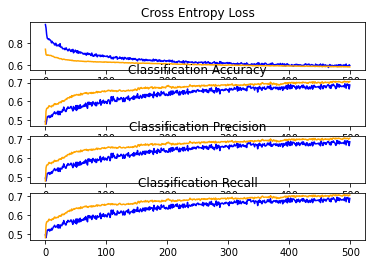

<Figure size 432x288 with 0 Axes>

In [49]:
#plot_hist(hist)
summarize_diagnostics(hist)

In [50]:
test_loss, test_acc, precision,recall = model.evaluate(test_generator)
test_acc

19/19 [==============================] - 8s 423ms/step - loss: 0.5656 - binary_accuracy: 0.7368 - precision: 0.7368 - recall: 0.7368


0.7367549538612366

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from keras import metrics
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)
true_classes = test_generator.classes

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report) 

19/19 [==============================] - 8s 420ms/step
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 

In [52]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Abnormal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[298  46]
 [124 136]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.71      0.87      0.78       344
    Abnormal       0.75      0.52      0.62       260

    accuracy                           0.72       604
   macro avg       0.73      0.69      0.70       604
weighted avg       0.72      0.72      0.71       604



In [53]:
keras.metrics.binary_accuracy(test_generator.classes, y_pred)
y_predprob=model.predict_proba(test_generator)

C:\Users\Mojtaba Jafari Tadi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [54]:
print(y_predprob)

[[0.3469564  0.6530435 ]
 [0.57903916 0.42096084]
 [0.54408616 0.45591384]
 ...
 [0.23704508 0.76295495]
 [0.3781847  0.6218153 ]
 [0.694075   0.3059251 ]]


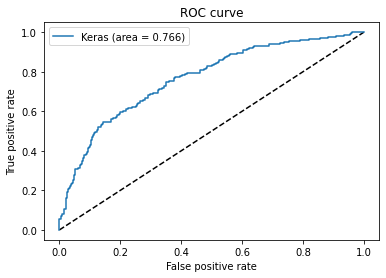

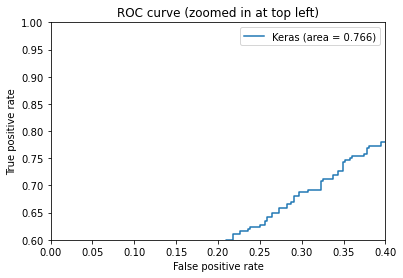

In [55]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, Y_pred[:,1])

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
